In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset 
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#Initial Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.shape

(545, 13)

In [5]:
#Checking for duplicate values
df.duplicated().any()

False

In [6]:
#Statistical summary of the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
#Checking for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

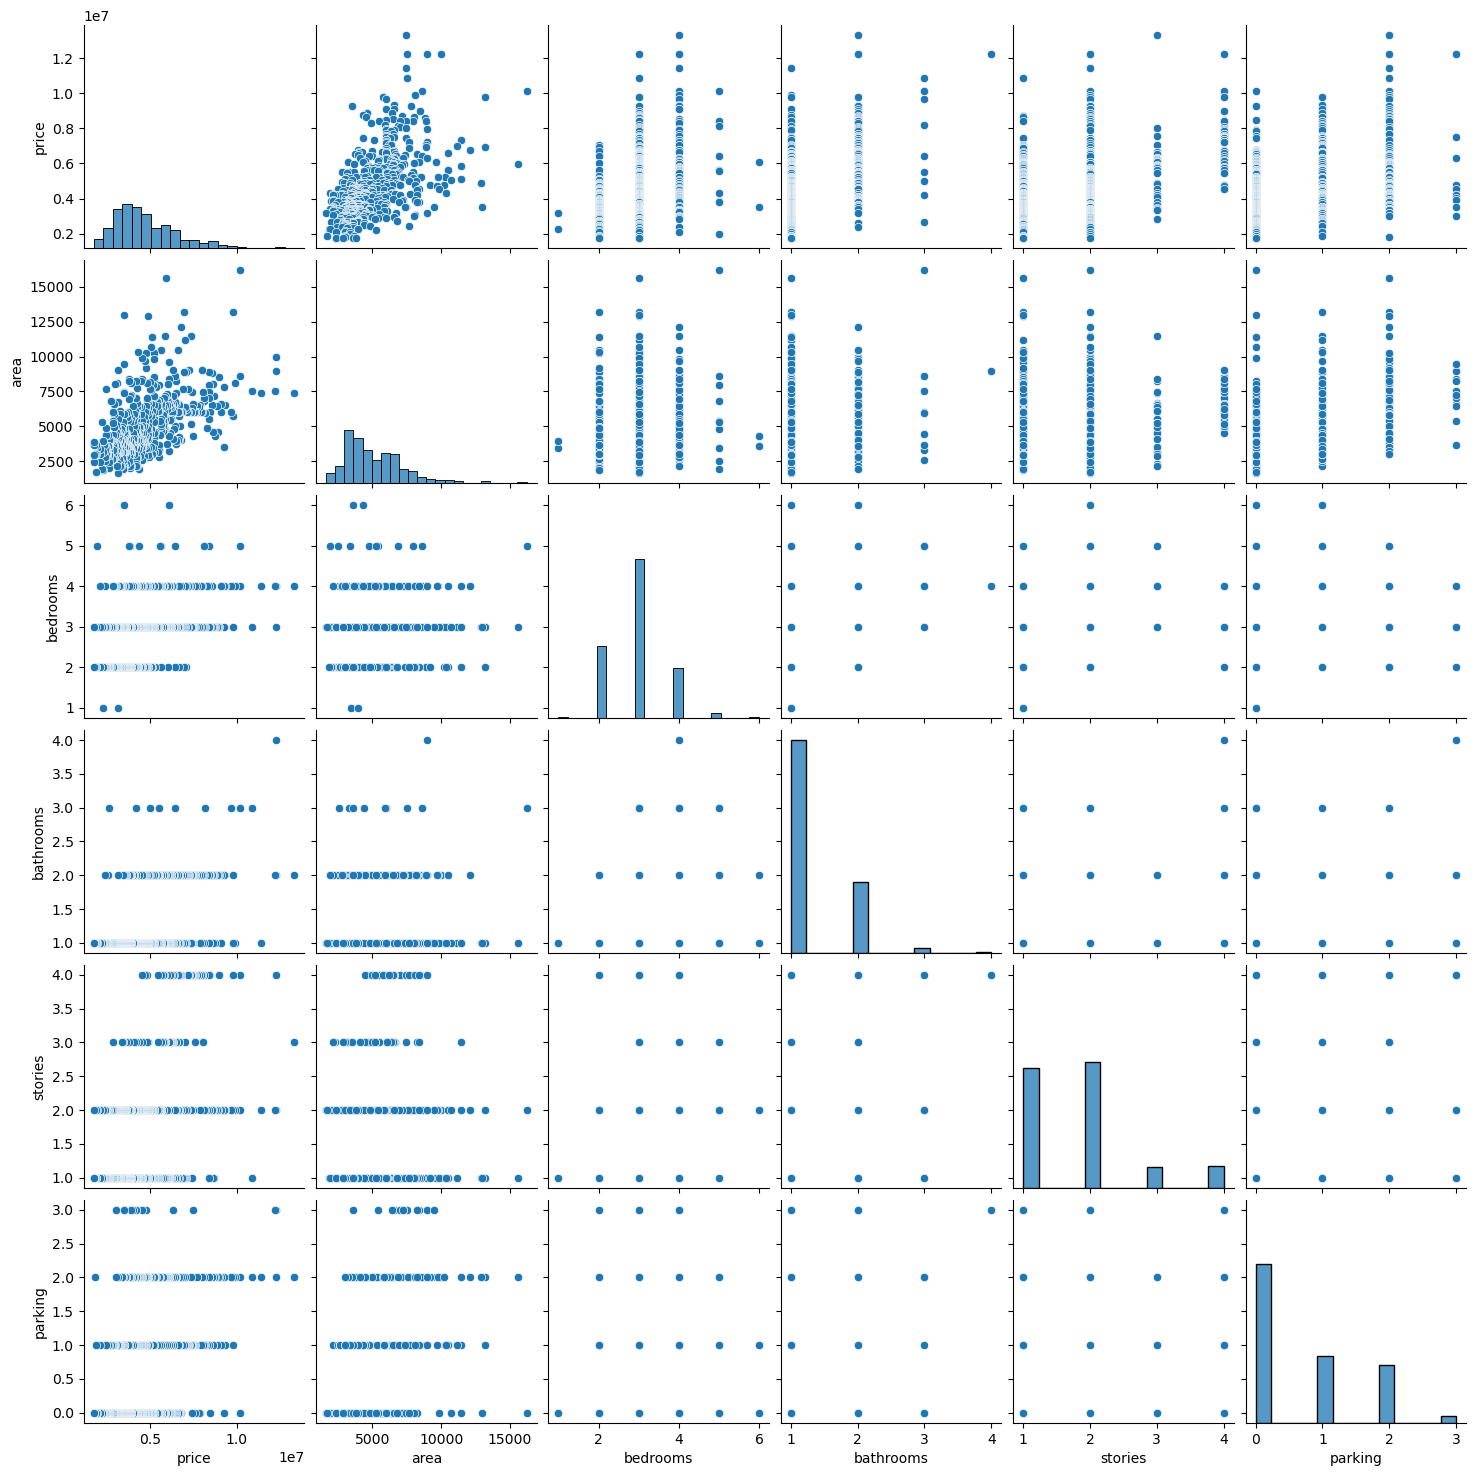

In [9]:
sns.pairplot(df)

In [10]:
df_numeric = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

In [11]:
df_numeric

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


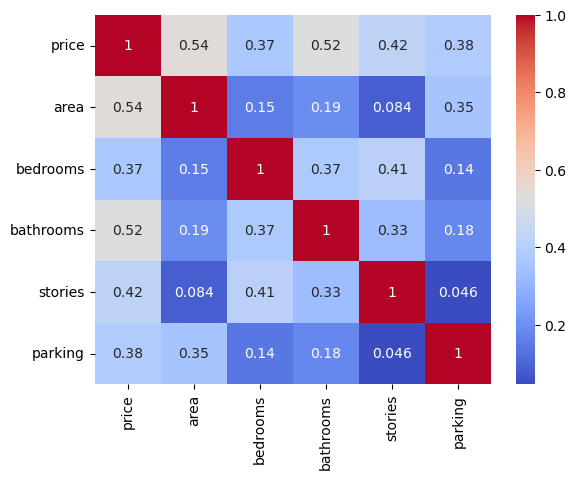

In [12]:
#Checking correlation using heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

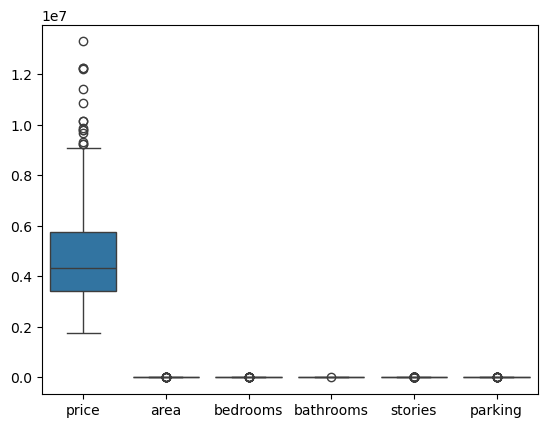

In [13]:
sns.boxplot(df)

In [14]:
# Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [15]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [16]:
#Detecting and Treating Outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_cleaned

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [19]:
#Standardscaling
scaler = StandardScaler()
scaled_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [20]:
# Assigning X and y values for independent and dependent variables
X = df_cleaned.drop(columns=['price'])  # Features (everything except price)
y = df_cleaned['price'] 

In [21]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
152,5400,5,1,2,1,1,1,0,1,0,1,False,False
541,2400,3,1,1,0,0,0,0,0,0,0,True,False
432,6060,3,1,1,1,1,1,0,0,0,0,False,False
532,3000,2,1,1,0,0,0,0,0,0,0,False,True
84,3760,3,1,2,1,0,0,1,0,2,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,6670,3,1,3,1,0,1,0,0,0,1,False,True
121,7231,3,1,2,1,1,1,0,1,0,1,True,False
285,6650,3,1,2,1,1,0,0,0,0,0,True,False
450,3450,3,1,2,1,0,1,0,0,0,0,True,False


In [23]:
y_train

152    5565000
541    1767150
432    3290000
532    2135000
84     6510000
        ...   
86     6510000
121    5950000
285    4235000
450    3150000
117    5950000
Name: price, Length: 424, dtype: int64

In [24]:
#Model Training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
#Make Prediction
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
y_pred

array([5832190.25067735, 4746657.69156266, 6274859.93635193,
       3852171.37479281, 4474905.11555893, 5968058.09988365,
       4408555.87183571, 2462304.35657169, 2860865.24071823,
       5703781.55681574, 7577021.44247757, 3414974.93873737,
       6713109.58970331, 3764315.56735964, 3488225.91946642,
       2332724.05732714, 7412805.88301596, 5552154.25565537,
       4326858.06008733, 2767079.29646104, 3125018.39465865,
       4203332.6860202 , 5882141.38830021, 5883340.05153645,
       4439806.4728002 , 3511360.77384381, 6152149.24925353,
       5132943.12715525, 4853372.17436546, 4464883.98451652,
       6096507.63528527, 6163146.97526713, 2451706.22541461,
       3679804.18435151, 6075786.92678763, 4651491.19508264,
       4550500.00545184, 6611071.52596231, 6648134.43829522,
       4207147.20119939, 3983247.29798885, 3394977.93569746,
       4951834.80657274, 4361862.05512532, 2985039.37337927,
       2859065.51044464, 4158627.68662917, 4818819.86744941,
       4969850.78111667,

In [26]:
#Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-square:", R2_score)

Mean Squared Error: 1148203524699.743
R-square: 0.6684003582833371


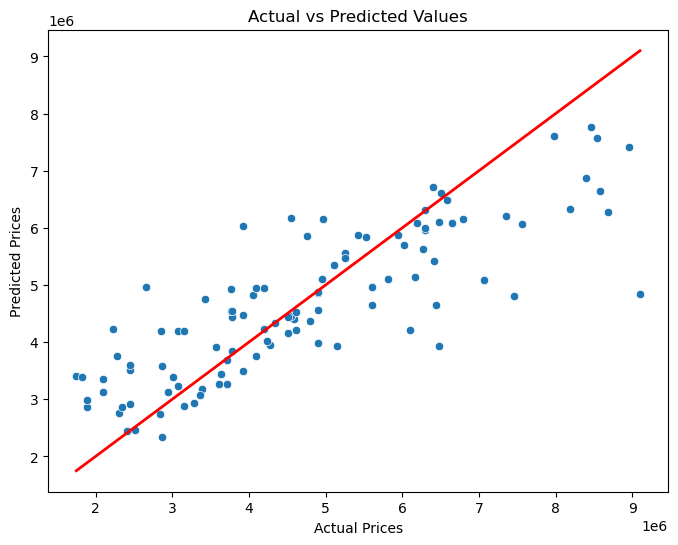

In [27]:
#Visualize the actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()